In [2]:
!pip install cyvcf2

     |████████████████████████████████| 9.7MB 14.6MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 


In [3]:
!pip install pyvcf

  Created wheel for pyvcf: filename=PyVCF-0.6.8-cp37-cp37m-linux_x86_64.whl size=124079 sha256=ba1f2f4993f6adb202df9968ea03d13cde493f5fd7fc940815ac365e54062bd4
  Stored in directory: /root/.cache/pip/wheels/81/91/41/3272543c0b9c61da9c525f24ee35bae6fe8f60d4858c66805d
Successfully built pyvcf


In [1]:
!pip install geoopt

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

from cyvcf2 import VCF, Writer

import gzip

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Preprocessing

In [5]:
!ls

data_temp.txt  Kidd.55AISNP.1kG.vcf  my_hyperbolic_vae.zip  sample_data


In [6]:
samples = 'ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel'
dfsamples = pd.read_csv(samples, sep='\t')
dfsamples.set_index('sample', inplace=True)
dfsamples.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)

dfsamples.head()

,pop,super_pop,gender
sample,,,
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female
HG00101,GBR,EUR,male


In [7]:
vcf_file = VCF('Kidd.55AISNP.1kG.vcf')
#vcf_file = VCF('ALL.chr22.phase3_shapeit2_mvncall_integrated_v4.20130502.genotypes_10k.vcf.gz')
#vcf_file = VCF('ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz')
#vcf_file = VCF('Pundamilia.RAD.vcf.gz')

data = pd.DataFrame(index=vcf_file.samples)
flag = 0
temp = []
print(vcf_file.samples)
for variant in vcf_file():
    if(flag == 2):
      print(type(variant))
      print(variant.gt_types)
      temp=variant.gt_types
      print(variant)
    

    #data[variant.ID] = variant.gt_types
    data[str(flag)] = variant.gt_types
    flag +=1
    if(flag % 10000 == 0):
      print(flag)

data.head()

['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102', 'HG00103', 'HG00105', 'HG00106', 'HG00107', 'HG00108', 'HG00109', 'HG00110', 'HG00111', 'HG00112', 'HG00113', 'HG00114', 'HG00115', 'HG00116', 'HG00117', 'HG00118', 'HG00119', 'HG00120', 'HG00121', 'HG00122', 'HG00123', 'HG00125', 'HG00126', 'HG00127', 'HG00128', 'HG00129', 'HG00130', 'HG00131', 'HG00132', 'HG00133', 'HG00136', 'HG00137', 'HG00138', 'HG00139', 'HG00140', 'HG00141', 'HG00142', 'HG00143', 'HG00145', 'HG00146', 'HG00148', 'HG00149', 'HG00150', 'HG00151', 'HG00154', 'HG00155', 'HG00157', 'HG00158', 'HG00159', 'HG00160', 'HG00171', 'HG00173', 'HG00174', 'HG00176', 'HG00177', 'HG00178', 'HG00179', 'HG00180', 'HG00181', 'HG00182', 'HG00183', 'HG00185', 'HG00186', 'HG00187', 'HG00188', 'HG00189', 'HG00190', 'HG00231', 'HG00232', 'HG00233', 'HG00234', 'HG00235', 'HG00236', 'HG00237', 'HG00238', 'HG00239', 'HG00240', 'HG00242', 'HG00243', 'HG00244', 'HG00245', 'HG00246', 'HG00250', 'HG00251', 'HG00252', 'HG00253'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
HG00096,0,1,0,3,0,0,0,1,0,3,0,1,3,0,0,3,3,0,0,1,0,3,0,0,0,0,1,0,0,0,0,3,3,0,0,1,1,0,3,0,1,0,0,0,0,0,0,1,0,0,3,3,1,1,0
HG00097,0,3,0,3,0,0,0,0,0,3,0,1,3,0,0,3,3,1,0,3,0,3,1,1,0,0,0,0,0,3,0,1,3,0,0,1,0,0,3,0,1,0,0,1,0,1,0,3,0,0,3,1,0,0,1
HG00099,0,1,0,1,3,1,0,3,0,3,0,1,3,0,0,1,3,1,0,3,0,3,0,1,0,0,0,0,0,1,0,3,3,1,1,1,0,0,3,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
HG00100,0,3,0,3,0,0,0,3,1,3,1,0,3,0,0,3,1,0,0,3,0,3,1,1,0,0,1,1,0,0,0,3,3,3,0,3,1,0,3,1,0,0,0,0,0,1,0,3,1,0,3,3,0,0,0
HG00101,0,1,0,3,1,1,0,3,3,3,1,1,3,0,0,3,3,0,0,3,1,3,0,0,0,0,0,0,0,0,0,3,3,1,1,3,0,0,3,0,1,0,1,0,0,0,0,3,0,0,3,3,1,0,1


In [ ]:
data.shape

(2504, 55)

In [ ]:
with gzip.open('ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz', 'rt') as f:
  print(f.read(100000))

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##fileDate=20150218
##reference=ftp://ftp.1000genomes.ebi.ac.uk//vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz
##source=1000GenomesPhase3Pipeline
##contig=<ID=1,assembly=b37,length=249250621>
##contig=<ID=2,assembly=b37,length=243199373>
##contig=<ID=3,assembly=b37,length=198022430>
##contig=<ID=4,assembly=b37,length=191154276>
##contig=<ID=5,assembly=b37,length=180915260>
##contig=<ID=6,assembly=b37,length=171115067>
##contig=<ID=7,assembly=b37,length=159138663>
##contig=<ID=8,assembly=b37,length=146364022>
##contig=<ID=9,assembly=b37,length=141213431>
##contig=<ID=10,assembly=b37,length=135534747>
##contig=<ID=11,assembly=b37,length=135006516>
##contig=<ID=12,assembly=b37,length=133851895>
##contig=<ID=13,assembly=b37,length=115169878>
##contig=<ID=14,assembly=b37,length=107349540>
##contig=<ID=15,assembly=b37,length=102531392>
##contig=<ID=16,assembly=b37,length=90354753>
##contig

In [ ]:
data.drop(data.columns[[0, 1]], axis=1, inplace=True)

In [ ]:
data

,NaN,DUP_gs_CNV_22_16050654_16063474,rs139377059,rs367963583,rs188945759,rs7288968,rs62224609,rs143503259,rs192339082,rs201906224,rs4965031,rs187181153,rs191584855,rs201290950,rs184458566,rs188996808,rs142442817,rs139918843,rs149990453,rs376238049,rs200777521,rs375566279,rs185556414,rs80167676,rs137924577,rs141264943,rs117569664,rs11703994,rs113763510,rs181029838,rs62224614,rs78724352,rs369696918,rs367578016,rs373998521,rs188793777,rs9604721,rs146865030,rs376185376,rs55926024,...,rs201079654,rs139777514,rs192995380,rs369904001,rs184258966,rs189461356,rs151231161,rs181922237,YL_CN_STU_4360,rs200886445,rs186150834,rs144141280,rs201148621,rs200864975,rs370362628,rs145562962,rs148442741,rs201190657,rs180720727,rs186516442,rs191421059,rs76985837,rs116987804,rs146908746,rs202113192,rs372305484,rs186145066,rs375188786,rs187716322,rs200387114,rs201053955,rs199657114,rs192479180,rs188090019,rs192883410,rs199503349,rs370961376,rs376053300,rs80250454,rs199919400
HG00096,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3,...,3,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
HG00097,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0
HG00099,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,1,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,1,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0
NA21141,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,1,0,0,1,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,1,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
NA21142,0,0,0,0,0,0,1,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
NA21143,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,3,0,1,0,3,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0


In [ ]:
np.unique(data)

array([0, 1, 3], dtype=int32)

In [ ]:
data.shape, dfsamples.shape

((2504, 55), (2504, 3))

In [ ]:
# One-hot encoding
X = pd.get_dummies(data, columns=data.columns)
X.shape

(2504, 165)

In [5]:
# One-hot encoding
ncols = len(data.columns)
ohe = OneHotEncoder(categories=[range(4)] * ncols, sparse=False)

X = ohe.fit_transform(data.values)

# Simulations

In [3]:
X = np.genfromtxt('data_simulation_10k.txt', dtype=int, delimiter=', ')
#labels = np.genfromtxt('labels_temp.txt', dtype=int, delimiter=', ')

y = np.zeros(X.shape[0])
y[100:200] = 1
y[200:] = 2

# shuffle
shuffle_arr = np.column_stack((X, y))
np.random.shuffle(shuffle_arr)
X = shuffle_arr[:, :-1]
y = shuffle_arr[:, -1]

le = LabelEncoder()
labels = le.fit_transform(y)

In [4]:
labels

array([1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1,
       0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1,
       2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2])

# Pyvcf

In [ ]:
import vcf

In [ ]:
def read(f):
    reader = vcf.Reader(open(f))
    df = pd.DataFrame([vars(r) for r in reader])
    out = df.merge(pd.DataFrame(df.INFO.tolist()),
                   left_index=True, right_index=True)
    return out

In [ ]:
data = read('Kidd.55AISNP.1kG.vcf')
data.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,start,end,alleles,samples,_sample_indexes,affected_start,affected_end,AC,AF,AN,NS,DP,EAS_AF,AMR_AF,AFR_AF,EUR_AF,SAS_AF,AA
0,1,101709563,rs3737576,T,[C],100,[],"{'AC': [421], 'AF': [0.0840655], 'AN': 5008, '...",GT,101709562,101709563,"[T, C]","[Call(sample=HG00096, CallData(GT=0|0)), Call(...","{'HG00096': 0, 'HG00097': 1, 'HG00099': 2, 'HG...",101709562,101709563,[421],[0.0840655],5008,2504,19355,[0.0804],[0.3256],[0.0166],[0.0527],[0.0399],T|||
1,1,151122489,rs7554936,C,[T],100,[],"{'AC': [2809], 'AF': [0.560903], 'AN': 5008, '...",GT,151122488,151122489,"[C, T]","[Call(sample=HG00096, CallData(GT=0|1)), Call(...","{'HG00096': 0, 'HG00097': 1, 'HG00099': 2, 'HG...",151122488,151122489,[2809],[0.560903],5008,2504,20211,[0.8562],[0.6801],[0.0303],[0.666],[0.7812],c|||
2,1,159174683,rs2814778,T,[C],100,[],"{'AC': [1334], 'AF': [0.266374], 'AN': 5008, '...",GT,159174682,159174683,"[T, C]","[Call(sample=HG00096, CallData(GT=0|0)), Call(...","{'HG00096': 0, 'HG00097': 1, 'HG00099': 2, 'HG...",159174682,159174683,[1334],[0.266374],5008,2504,16337,[0.0],[0.0778],[0.9637],[0.006],[0.0],T|||
3,2,7968275,rs798443,G,[A],100,[],"{'AC': [2667], 'AF': [0.532548], 'AN': 5008, '...",GT,7968274,7968275,"[G, A]","[Call(sample=HG00096, CallData(GT=1|1)), Call(...","{'HG00096': 0, 'HG00097': 1, 'HG00099': 2, 'HG...",7968274,7968275,[2667],[0.532548],5008,2504,17586,[0.6329],[0.6744],[0.0628],[0.8191],[0.6687],G|||
4,2,17362568,rs1876482,G,[A],100,[],"{'AC': [1242], 'AF': [0.248003], 'AN': 5008, '...",GT,17362567,17362568,"[G, A]","[Call(sample=HG00096, CallData(GT=0|0)), Call(...","{'HG00096': 0, 'HG00097': 1, 'HG00099': 2, 'HG...",17362567,17362568,[1242],[0.248003],5008,2504,21508,[0.7748],[0.2305],[0.0023],[0.0775],[0.2249],G|||


In [ ]:
df = pd.DataFrame

In [ ]:
data.samples[1][0].

Call(sample=HG00096, CallData(GT=0|1))

In [ ]:
vcf_reader = vcf.Reader(filename='ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz', compressed=True)

In [ ]:
vcf_reader.metadata

OrderedDict([('fileformat', 'VCFv4.1'),
             ('fileDate', '20150218'),
             ('reference',
              'ftp://ftp.1000genomes.ebi.ac.uk//vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz'),
             ('source', ['1000GenomesPhase3Pipeline'])])

In [ ]:
record = next(vcf_reader)

In [ ]:
record.samples

[Call(sample=HG00096, CallData(GT=0|0)),
 Call(sample=HG00097, CallData(GT=0|0)),
 Call(sample=HG00099, CallData(GT=0|0)),
 Call(sample=HG00100, CallData(GT=0|0)),
 Call(sample=HG00101, CallData(GT=0|0)),
 Call(sample=HG00102, CallData(GT=0|0)),
 Call(sample=HG00103, CallData(GT=0|0)),
 Call(sample=HG00105, CallData(GT=0|0)),
 Call(sample=HG00106, CallData(GT=0|0)),
 Call(sample=HG00107, CallData(GT=0|0)),
 Call(sample=HG00108, CallData(GT=0|0)),
 Call(sample=HG00109, CallData(GT=0|0)),
 Call(sample=HG00110, CallData(GT=0|1)),
 Call(sample=HG00111, CallData(GT=0|0)),
 Call(sample=HG00112, CallData(GT=0|0)),
 Call(sample=HG00113, CallData(GT=0|0)),
 Call(sample=HG00114, CallData(GT=0|0)),
 Call(sample=HG00115, CallData(GT=0|0)),
 Call(sample=HG00116, CallData(GT=0|0)),
 Call(sample=HG00117, CallData(GT=0|0)),
 Call(sample=HG00118, CallData(GT=0|0)),
 Call(sample=HG00119, CallData(GT=0|0)),
 Call(sample=HG00120, CallData(GT=0|0)),
 Call(sample=HG00121, CallData(GT=0|0)),
 Call(sample=HG0

# PCA

In [38]:
X_pca = PCA(n_components=2).fit_transform(X)

In [27]:
X_pca = PCA(n_components=2).fit_transform(data)
X = data.copy()

In [36]:
X_pca.shape

(2504, 2)

In [6]:
# Кодирование популяций
le = LabelEncoder()
labels = le.fit_transform(dfsamples['super_pop'].values)

In [14]:
# Классы
le.inverse_transform(np.unique(labels))

array([0., 1., 2.])

In [39]:
def plot_samples(X_pca, x_component=None, y_component=None):

    unique = np.unique(labels)

    plt.figure(figsize=(10,10));
    for (i,cla) in enumerate(set(labels)):

        xc = [p for (j,p) in enumerate(X_pca[:, x_component-1]) if labels[j]==cla]
        yc = [p for (j,p) in enumerate(X_pca[:, y_component-1]) if labels[j]==cla]

        plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])
    plt.legend()

    plt.title('Projection of 1000 Genomes Samples\ninto Lower Dimensional Space\nUsing 55 AIMs from Kidd et al.')

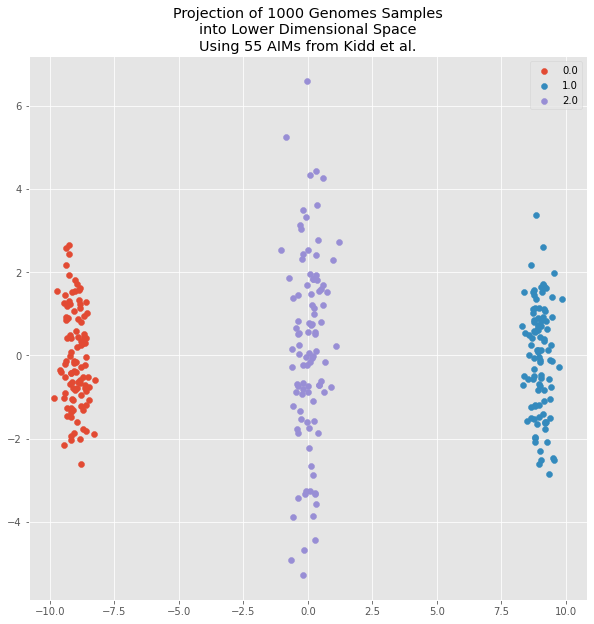

In [40]:
plot_samples(X_pca, x_component=1, y_component=2)

In [17]:
X_pca

array([[-8.71598694e+00, -2.86750079e+00],
       [-9.34569670e+00, -7.73322788e-01],
       [-9.33372359e+00,  3.08221843e-01],
       [-9.46403636e+00, -4.64477852e-01],
       [-8.72463297e+00, -3.29457779e-01],
       [-8.83144558e+00, -2.07665593e-01],
       [-8.59788561e+00,  7.25985228e-01],
       [-9.27641128e+00, -1.44419037e+00],
       [-9.15947369e+00,  2.37456942e+00],
       [-8.80718529e+00, -6.21616161e-01],
       [-8.99924197e+00,  1.31366423e+00],
       [-9.27199732e+00,  1.88361160e+00],
       [-8.64437483e+00,  3.47757160e-01],
       [-8.96988114e+00, -3.62469775e-01],
       [-9.04863082e+00, -3.72778580e+00],
       [-8.73968685e+00,  3.82877314e+00],
       [-8.90710462e+00,  1.67672451e+00],
       [-9.22770071e+00, -2.36139625e+00],
       [-9.42880786e+00,  1.03858630e+00],
       [-9.41220818e+00, -2.91594742e+00],
       [-8.69115977e+00, -1.50498195e-01],
       [-9.63006734e+00, -1.14105290e+00],
       [-9.19018906e+00,  2.40209191e+00],
       [-8.

# VAE

In [5]:
import torch
from torch import nn
from torch.autograd import Variable

In [6]:
representation_size = 2
input_size = X.shape[1]
n_samples = X.shape[0]
batch_size = 16

In [7]:
n_samples_per_batch = n_samples//input_size

x = X.copy()
#x = X.values
x = x.astype(np.float32)

In [26]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.en1 = nn.Linear(input_size, 200)
        self.en_mu = nn.Linear(200, representation_size)
        self.en_std = nn.Linear(200, representation_size)
        self.de1 = nn.Linear(representation_size, 200)
        self.de2 = nn.Linear(200, input_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def encode(self, x):
        h1 = self.relu(self.en1(x))
        return self.en_mu(h1), self.en_std(h1)
    
    def decode(self, z):
        
        h2 = self.relu(self.de1(z))
        return self.sigmoid(self.de2(h2))
    
    def reparam(self, mu, logvar):
        """Reparameterisation trick to sample z values."""
        
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
            
    
    def forward(self, x):
        """Takes a batch of samples, encodes them, and then decodes them again to compare."""
        mu, logvar = self.encode(x.view(-1, input_size))
        z = self.reparam(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss(self, reconstruction, x, mu, logvar):
        """ELBO assuming entries of x are binary variables, with closed form KLD."""
        
        bce = torch.nn.functional.binary_cross_entropy(reconstruction, x.view(-1, input_size))
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        # Normalise by same number of elements as in reconstruction
        KLD /= x.view(-1, input_size).data.shape[0] * input_size

        return bce + KLD
    
    def get_z(self, x):
        """Encode a batch of data points, x, into their z representations."""
        
        mu, logvar = self.encode(x.view(-1, input_size))
        return self.reparam(mu, logvar)

In [43]:
model = VAE()

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [45]:
def train(epoch, batches_per_epoch = 64, log_interval=500):
    model.train()
    
    ind = np.arange(x.shape[0])
    for i in range(batches_per_epoch):
        #print('dsag', x[['rs3737576_0']])
        #print(np.random.choice(ind, size=batch_size))
        data = torch.from_numpy(x[np.random.choice(ind, size=batch_size)])
        data = Variable(data, requires_grad=False)

        # Зануление градиента
        optimizer.zero_grad()

        # Предсказание и loss
        recon_batch, mu, logvar = model(data)
        loss = model.loss(recon_batch, data, mu, logvar)
        
        # backward
        loss.backward()

        # Обновление весов
        optimizer.step()

        if (i % log_interval == 0) and (epoch % 5 ==0):
            #Print progress
            print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
                epoch, i * batch_size, batch_size*batches_per_epoch,
                loss.data / len(data)), 'len_data = ', len(data))

    print('====> Epoch: {} done!'.format(epoch))

In [46]:
for epoch in range(1, 11):
    train(epoch)
    

====> Epoch: 1 done!
====> Epoch: 2 done!
====> Epoch: 3 done!
====> Epoch: 4 done!
Train Epoch: 5 [0/1024]	Loss: 0.011023 len_data =  16
====> Epoch: 5 done!
====> Epoch: 6 done!
====> Epoch: 7 done!
====> Epoch: 8 done!
====> Epoch: 9 done!
Train Epoch: 10 [0/1024]	Loss: 0.010809 len_data =  16
====> Epoch: 10 done!


In [47]:
Var = Variable(torch.from_numpy(x), requires_grad=False)
model.train()
zs = model.get_z(Var).data.numpy()

In [16]:
print(x)
print(x.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
(2504, 220)


In [ ]:
zs.shape

(2504, 2)

In [ ]:
zs[0]

array([-0.9195932,  1.1564176], dtype=float32)

In [ ]:
np.unique(dfsamples['super_pop'])

array(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'], dtype=object)

In [10]:
y = dfsamples['super_pop']
le = LabelEncoder()
y_labels = le.fit_transform(y.values)

In [ ]:
y_labels

array([3, 3, 3, ..., 4, 4, 4])

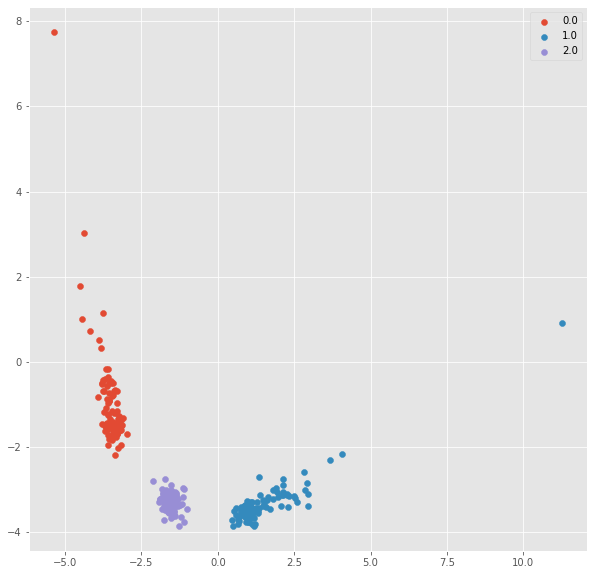

In [48]:
plt.figure(figsize=(10,10))

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])

plt.legend()

In [21]:
model.parameters

<bound method Module.parameters of VAE(
  (en1): Linear(in_features=220, out_features=200, bias=True)
  (en_mu): Linear(in_features=200, out_features=2, bias=True)
  (en_std): Linear(in_features=200, out_features=2, bias=True)
  (de1): Linear(in_features=2, out_features=200, bias=True)
  (de2): Linear(in_features=200, out_features=220, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)>

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import axes3d 

In [ ]:
%%matplotlib inline

UsageError: Cell magic `%%matplotlib` not found (But line magic `%matplotlib` exists, did you mean that instead?).


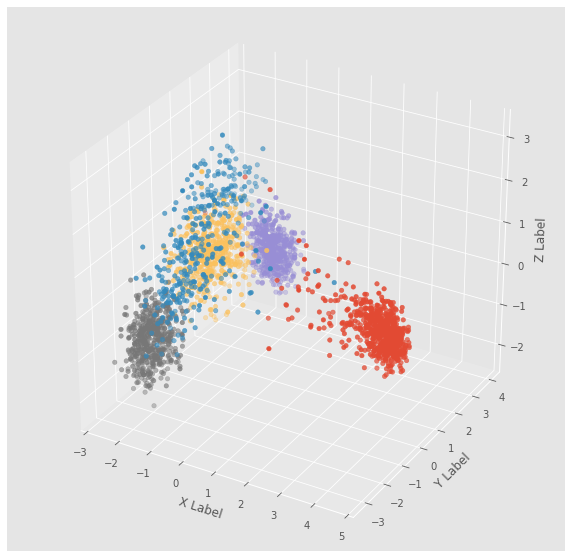

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for (i,cla) in enumerate(set(y_labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]
  zc = [p for (j,p) in enumerate(zs[:, 2]) if labels[j]==cla]

  ax.scatter(xc, yc, zc, label=le.inverse_transform([cla])[0])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#ax.view_init(45, 0)

plt.show()

In [ ]:
names=[]


for angle in range(0, 360, 2):
    
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for (i,cla) in enumerate(set(y_labels)):
      xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
      yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]
      zc = [p for (j,p) in enumerate(zs[:, 2]) if labels[j]==cla]
      ax.view_init(30, angle)
      ax.scatter(xc, yc, zc)

    plt.savefig('picLAB5'+str(angle)+'.png')
    names += ['picLAB5'+str(angle)+'.png'] 
    plt.close()

In [ ]:
import imageio
images = []
for filename in names:
    images.append(imageio.imread(filename))
imageio.mimsave('3d.gif', images)

# Hyperbolic VAE

In [ ]:
!unzip my_hyperbolic_vae.zip

In [10]:
%cd my_hyperbolic_vae

/content/my_hyperbolic_vae


In [12]:
!ls

hvae  hyperbolic_plot.png  project_structure.txt


In [11]:
import os
import json
import math
import torch
from torch import optim
from torch.autograd import Variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import hvae.objectives
import hvae.models
from hvae.models.genomic_vae import GenomicVAE

if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

print(device)

cuda:0


In [14]:
input_size = [X.shape[1]]
model = GenomicVAE(input_size)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_function = hvae.objectives.vae_objective

def train(epoch, batches_per_epoch=64):
    model.train() # from nn.Module
    b_loss, b_recon, b_kl = 0.0, 0.0, 0.0

    ind = np.arange(x.shape[0])
    for i in range(batches_per_epoch):
        data = torch.from_numpy(x[np.random.choice(ind, size=batch_size)])
        data = Variable(data, requires_grad=False)
        data = data.float()
        optimizer.zero_grad()

        qz_x, px_z, lik, kl, loss = loss_function(model, data, 16, 1.0, components=True)

        loss.backward()
        optimizer.step()

        b_loss += loss.item()
        b_recon += -lik.mean(0).sum().item()
        b_kl += kl.sum(-1).mean(0).sum().item()

    if(epoch % 5 == 0):
      print('Train Epoch: {} \tLoss: {:.6f}'.format(
        epoch, b_loss / len(data)), 'len(data) = ', len(data))
    print('====> Epoch: {} done!'.format(epoch))


In [15]:
print('ok')
print(type(model))

for epoch in range(1, 11):
    train(epoch)

print((model.parameters))
print('p(z) params:')
print(model.pz_params)

ok
<class 'hvae.models.genomic_vae.GenomicVAE'>
====> Epoch: 1 done!
====> Epoch: 2 done!
====> Epoch: 3 done!
====> Epoch: 4 done!
Train Epoch: 5 	Loss: 605400.840820 len(data) =  16
====> Epoch: 5 done!
====> Epoch: 6 done!
====> Epoch: 7 done!
====> Epoch: 8 done!
====> Epoch: 9 done!
Train Epoch: 10 	Loss: 605120.600586 len(data) =  16
====> Epoch: 10 done!
<bound method Module.parameters of GenomicVAE(
  (enc): EncWrapped(
    (manifold): PoincareBall manifold
    (enc): Sequential(
      (0): Sequential(
        (0): Linear(in_features=10000, out_features=200, bias=True)
        (1): ReLU()
      )
    )
    (fc21): Linear(in_features=200, out_features=2, bias=True)
    (fc22): Linear(in_features=200, out_features=1, bias=True)
  )
  (dec): DecWrapped(
    (manifold): PoincareBall manifold
    (dec): Sequential(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=200, bias=True)
        (1): ReLU()
      )
    )
    (fc31): Linear(in_features=200, out_features=

In [16]:
Var = Variable(torch.from_numpy(x), requires_grad=False)
model.train()
zs = model.get_z(Var).data.numpy()
zs = zs[0]

In [ ]:
pd.DataFrame(zs).min()

0   -0.945888
1   -0.902390
dtype: float32

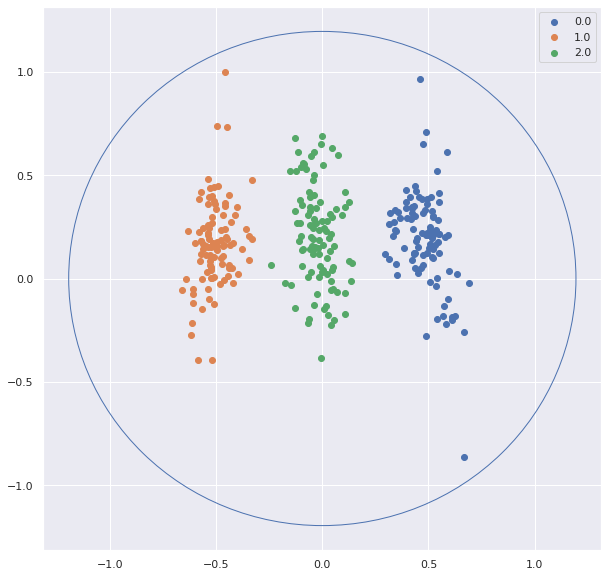

In [19]:
plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), 1/np.sqrt(0.7), color='b', fill=False)
ax = plt.gca()

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])


ax.add_patch(circle)
plt.legend()
plt.plot()
plt.savefig('hyperbolic_plot.png', dpi=300)

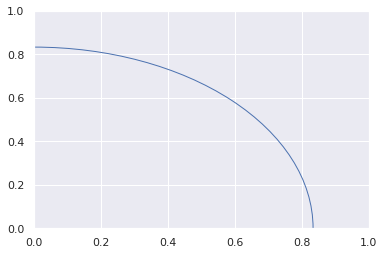

In [ ]:
circle = plt.Circle((0,0), 1/1.2, color='b', fill=False)

ax = plt.gca()
ax.add_patch(circle)


# Save Model

In [ ]:
torch.save(model, 'VAE_Bogdanov.pt')

In [ ]:
#model2 = VAE()
model2 = torch.load('VAE_Bogdanov.pt')
model2.eval()

VAE(
  (en1): Linear(in_features=220, out_features=200, bias=True)
  (en_mu): Linear(in_features=200, out_features=2, bias=True)
  (en_std): Linear(in_features=200, out_features=2, bias=True)
  (de1): Linear(in_features=2, out_features=200, bias=True)
  (de2): Linear(in_features=200, out_features=220, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
for parameter in model2.parameters():
    print(parameter.data)

tensor([[-0.0128, -0.0730,  0.0207,  ..., -0.0300,  0.0379, -0.0243],
        [ 0.0940, -0.0856, -0.0115,  ...,  0.0044, -0.0486, -0.3377],
        [ 0.0056, -0.0323,  0.0032,  ..., -0.0578, -0.0209,  0.0437],
        ...,
        [ 0.0220, -0.0393,  0.0600,  ...,  0.0225, -0.0276, -0.0572],
        [-0.0010,  0.0119,  0.0254,  ...,  0.0048, -0.0194,  0.0514],
        [ 0.0912, -0.1476,  0.0187,  ..., -0.3572,  0.0434, -0.5282]])
tensor([-2.5831e-02,  1.9620e-02,  9.1465e-03,  1.0067e-01,  6.8322e-02,
        -6.7814e-02,  1.6678e-02, -2.2771e-02, -3.2707e-02, -7.4370e-03,
         1.6793e-02, -9.1583e-02, -2.3510e-02,  1.0485e-02, -4.8286e-03,
         1.4034e-02,  1.3998e-02, -6.7039e-02,  2.6523e-02, -2.9545e-02,
        -3.6600e-02, -5.5695e-02, -4.0328e-02, -1.7412e-03, -7.4385e-02,
        -1.2628e-02, -3.4666e-03, -4.5689e-02, -1.7388e-03, -7.4355e-02,
         5.9170e-02, -2.0560e-02, -4.3269e-02,  1.0536e-04,  1.2040e-02,
         9.0687e-02, -5.9105e-02, -5.6970e-02, -8.8424e

In [ ]:
zs.shape

(2504, 3)

In [ ]:
X_pca.shape

(2504, 3)